In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# Load the data

In [2]:
import pathlib
data_dir = "train"
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1156


# Creating Data set

In [4]:
batch_size = 32
img_height = 200
img_width = 300

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=15,
  # image_size=(img_height, img_width),
  # batch_size=batch_size
  )

Found 1156 files belonging to 9 classes.
Using 925 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=15,
  # image_size=(img_height, img_width),
  # batch_size=batch_size
  )

Found 1156 files belonging to 9 classes.
Using 231 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Ajwa', 'Galaxy', 'Medjool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']


In [8]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [10]:
epochs=11
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/11
29/29 [==============================] - 22s 738ms/step - loss: 2.5129 - accuracy: 0.1395 - val_loss: 2.1821 - val_accuracy: 0.1342
Epoch 2/11
29/29 [==============================] - 21s 730ms/step - loss: 1.9889 - accuracy: 0.2735 - val_loss: 1.6113 - val_accuracy: 0.3983
Epoch 3/11
29/29 [==============================] - 21s 721ms/step - loss: 1.2390 - accuracy: 0.5795 - val_loss: 0.7949 - val_accuracy: 0.7706
Epoch 4/11
29/29 [==============================] - 22s 756ms/step - loss: 0.8408 - accuracy: 0.7005 - val_loss: 0.6861 - val_accuracy: 0.7922
Epoch 5/11
29/29 [==============================] - 21s 733ms/step - loss: 0.5777 - accuracy: 0.8141 - val_loss: 0.8149 - val_accuracy: 0.7403
Epoch 6/11
29/29 [==============================] - 22s 761ms/step - loss: 0.4791 - accuracy: 0.8357 - val_loss: 0.7094 - val_accuracy: 0.7965
Epoch 7/11
29/29 [==============================] - 22s 744ms/step - loss: 0.5400 - accuracy: 0.8216 - val_loss: 0.4510 - val_accuracy: 0.8874

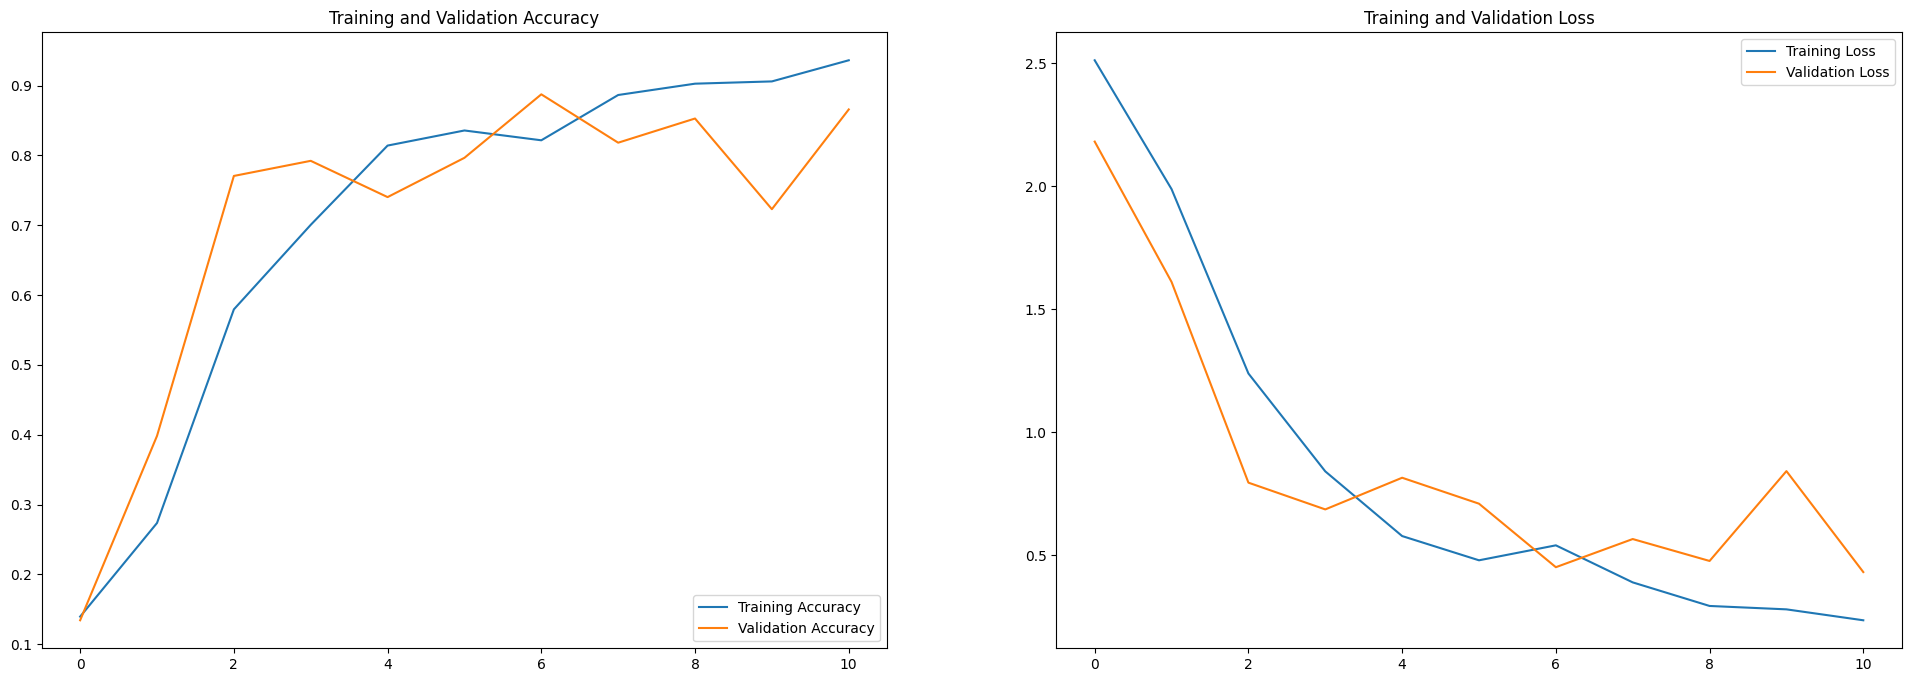

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing

In [12]:
test_dir = pathlib.Path("test")

test_image_count = len(list(test_dir.glob('*/*.jpg')))
print(test_image_count)

502


In [13]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  #image_size=(img_height, img_width),
  #batch_size=batch_size
  )

Found 502 files belonging to 9 classes.


getting labels & predicteds

In [14]:
y_test = []
y_pred_array = []
for images, labels in test_ds.take(test_ds.__len__()):
    for i in range(labels.__len__()):
        y_test.append(class_names[labels[i]])
        img_array = tf.keras.utils.img_to_array(images[i])
        img_array = tf.expand_dims(img_array, 0)
        y_pred_array.append(model.predict(img_array))

1/1 [==============================] - 0s 29ms/step


In [15]:
y_pred = []
y_pred_confidince = []
score = tf.nn.softmax(y_pred_array)

for i in range (len(score)):
    y_pred.append(class_names[np.argmax(score[i])])
    y_pred_confidince.append(100 * np.max(score[i]))
    # print(
    #     "This image most likely belongs to {} with a {:.2f} percent confidence."
    #     .format(class_names[np.argmax(score[i])], 100 * np.max(score[i]))
    # )

# Reports & Visualization

In [32]:
print(model.evaluate(x=test_ds))

16/16 [==============================] - 2s 118ms/step - loss: 0.3977 - accuracy: 0.8386
[0.3977290987968445, 0.8386453986167908]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Ajwa       0.93      1.00      0.96        53
      Galaxy       0.83      0.88      0.85        57
     Medjool       0.79      0.90      0.84        41
     Meneifi       0.75      0.81      0.78        70
   NabtatAli       0.79      0.83      0.81        54
       Rutab       0.93      0.89      0.91        44
     Shaishe       0.78      1.00      0.87        52
      Sokari       0.98      0.68      0.80        80
      Sugaey       0.83      0.67      0.74        51

    accuracy                           0.84       502
   macro avg       0.85      0.85      0.84       502
weighted avg       0.85      0.84      0.84       502



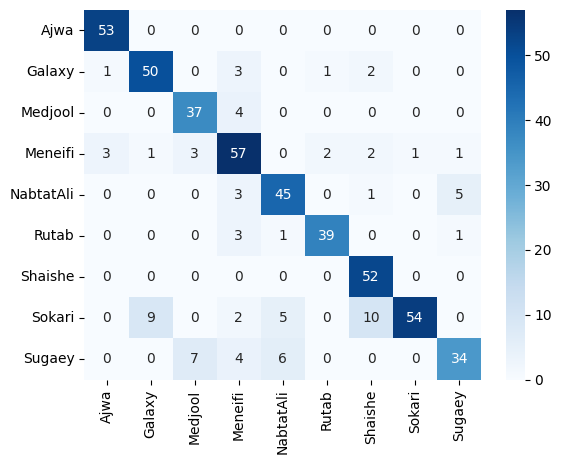

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names);

In [18]:
import os
import seaborn as sns
import pandas as pd
from matplotlib import pyplot

def imageCountplot(path):
  folder_dir = path
  dict = {'Image':[],
          'Class':[],
        }
    
  df = pd.DataFrame(dict)
  for classFolder in os.listdir(folder_dir):
      classFolderPath = str(folder_dir)+"/"+classFolder

      for image in os.listdir(classFolderPath):
        df.loc[len(df.index)] = [image, image[0:-7]] 

  a4_dims = (9, 6)
  fig, ax = pyplot.subplots(figsize=a4_dims)
  sns.countplot(x="Class",data=df)

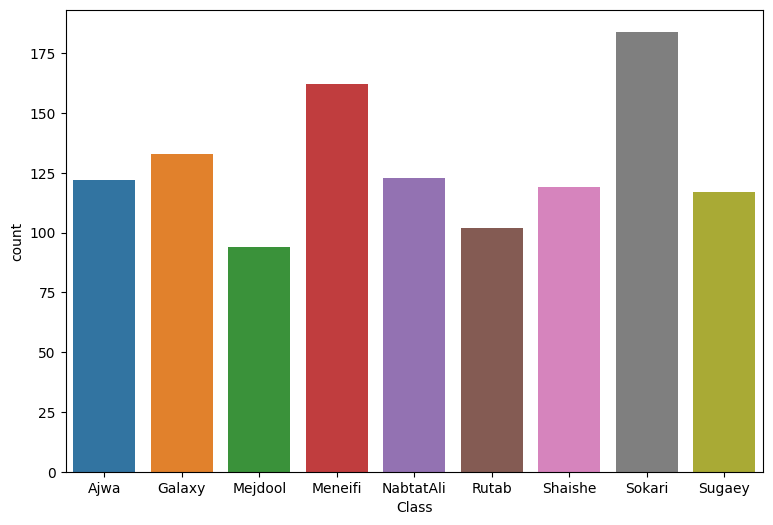

In [24]:
imageCountplot("train")

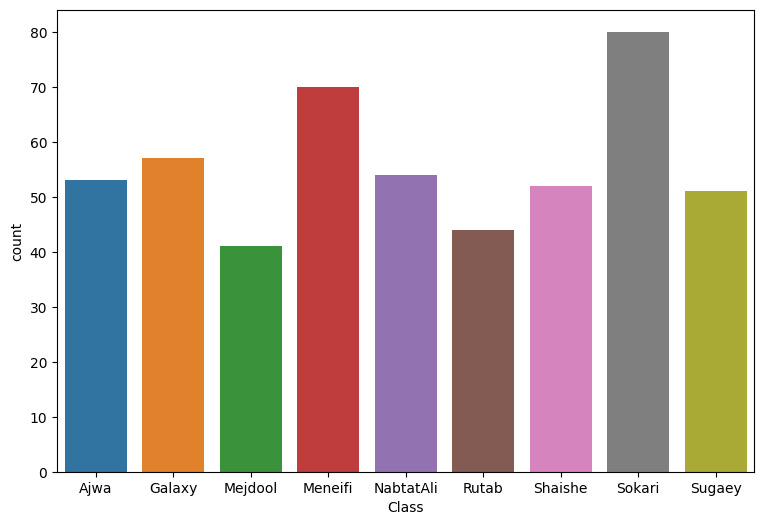

In [20]:
imageCountplot("test")

# Converting The model to .tflite

In [21]:
tflite_model_name = "tflite_model.tflite"
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model= model)


In [22]:
tflite_model = tflite_converter.convert()
open(tflite_model_name, 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ysyss\AppData\Local\Temp\tmp2u0o62qp\assets


INFO:tensorflow:Assets written to: C:\Users\ysyss\AppData\Local\Temp\tmp2u0o62qp\assets


67344820

In [23]:
tflite_model_name = "tflite_model.tflite"
tflite_model_dir = "saved_modele"

tf.saved_model.save(model,tflite_model_dir)
converter = tf.lite.TFLiteConverter.from_keras_model(model= model)

tflite_model = converter.convert()

# write the model into a file 
open(tflite_model_dir + "/" +tflite_model_name , 'wb').write(tflite_model)

# write the labels into a file (order is important)
labels_file = open(tflite_model_dir + "/" +"labels.txt" , 'w')
for i in range(len(class_names)):
  labels_file.write(str(i)+" "+ class_names[i]+"\n")

INFO:tensorflow:Assets written to: saved_modele\assets


INFO:tensorflow:Assets written to: saved_modele\assets


INFO:tensorflow:Assets written to: C:\Users\ysyss\AppData\Local\Temp\tmptztbkwph\assets


INFO:tensorflow:Assets written to: C:\Users\ysyss\AppData\Local\Temp\tmptztbkwph\assets
